In [2]:
# we need to import everything we need first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# initialize a Dataframe 'df_hc' with some dummy values
# Dummy values are in the  csv file, the string in the read_csv() represents where our csv file is located
# you can change the string path in the read_csv() to import the csv file from different folder
df_hc = pd.read_csv('Linear_Reg_Sales.csv')
df_hc.head() # show the first 5 pairs

,Advert,Sales
0,100,1000
1,200,1900
2,300,2900
3,400,4600
4,500,5300


In [5]:
df_hc.tail() # show the last 5 pairs

,Advert,Sales
10,1100,11222
11,1200,12333
12,1300,13444
13,1400,14555
14,1500,15662


In [6]:
# Show how many rows and columns our data has
# df_hc has 15 rows and 2 columns
print(df_hc.shape)

(15, 2)


In [7]:
# import seaborn for plotting
import seaborn as sns
# allow plots to appear within the notebook
%matplotlib inline

## Visualize 
We visualize the data using seaborn built in plotting function

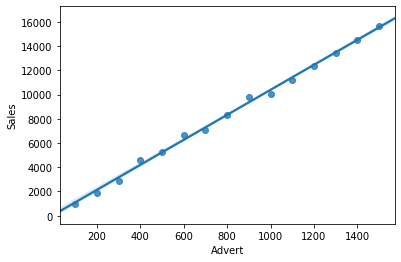

In [8]:
# sns.regplot is used for plot linear regression lines
# x is the name of the column we want to pass in as x
# y is the name of the column we want to pass in as y
# data is which dataframe we want this plot is based on
sns.regplot(x='Advert', y = 'Sales', data = df_hc)

# Model Training
### Train/Test split

To train a model, it is good practice to split your data into two sets:

training set
test set

This allows the model to avoid "overfitting", which is when the model is "too specific" to the data we give it.

The danger of overfitting is that the model can only work well with the data we've used to train it.
To avoid this, we usually "hold back" some of the data for "independent testing". This becomes the test set.

The above is the layman's explanation. We'll cover overfitting in more formal detail in the next module. Use Linear Regression model from Scikit Learn.


In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

advert = df_hc[['Advert']]
sales = df_hc['Sales'] # This is the same as
sales = df_hc.Sales

# default split ratio is 25% for test set
x_train, x_test, y_train, y_test = train_test_split(advert,sales, random_state = 1)


In [10]:
print(x_train.shape) # x_train and x_test shape should be 2D array
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11, 1)
(4, 1)
(11,)
(4,)


In [9]:
x_train.head()

,Advert
10,1100
4,500
1,200
13,1400
0,100


In [11]:
# import model
from sklearn.linear_model import LinearRegression

#instantiate
linReg = LinearRegression()

# fit out linear model to the train set data
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# print the intercept and coefficients
print(linReg.intercept_)
print(linReg.coef_)

57.1826846703716
[10.34091739]


## Predict data
We will use our model with x_test as input, to see how well our model fits

In [13]:
y_hat = linReg.predict(x_test)
print(x_test)
print(y_test)


   Advert
3     400
7     800
6     700
2     300
3    4600
7    8344
6    7111
2    2900
Name: Sales, dtype: int64


In [14]:
print(linReg.predict([[1600]]))  # predicting y value when x = 3.5, 
                                # note: we are using double square brackets because we need a 2D array as input

[16602.65051628]


## Model Validation

We want to see how well our model fits the data. We will use MSE and r2-score to check

A smaller mean-squared error is better, r2-score should be as close to 1 as possible

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# the error is large due to the data in our set are large values, we should use r2-score to check
mean_squared_error(y_test, y_hat) 

66719.71697952654

In [16]:
r2_score(y_test, y_hat)

0.9851944946887364

The r2-score for our model is very close to 1 which means our model gives a very accurate result.

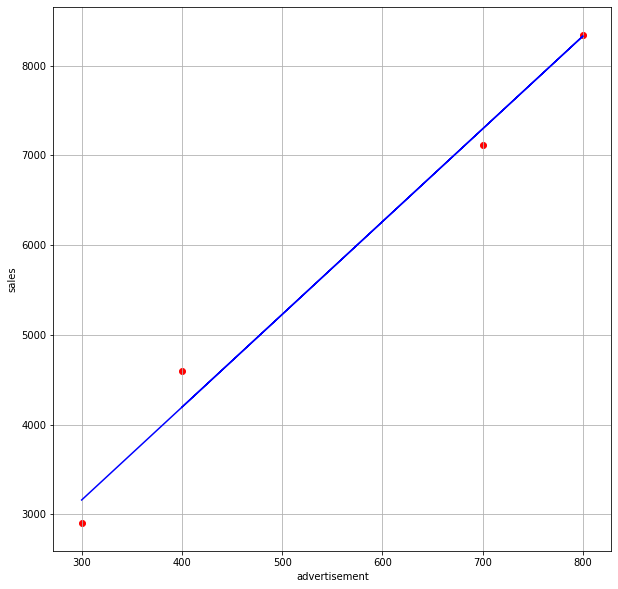

In [17]:
# we will plot the regression line (blue) and the actual data in testing set (red)

fig, ax = plt.subplots(figsize = (10,10))


ax.plot(x_test, y_hat, c = 'blue', label='Test data')
ax.scatter(x_test, y_test, c = 'red', label='Test points')
ax.set(xlabel='advertisement', ylabel='sales')
ax.grid()
plt.show()